# Visualize Image Filter

## Imports

In [1]:
%matplotlib inline
import cv2
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D

In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print('Using GPU')
    tf.config.experimental.set_memory_growth(gpu_devices[0], True)
else:
    print('Using CPU')

Using GPU


## Import the Image

In [3]:
# Feel free to try out your own images
img_path = 'images/building.png'

In [4]:
# load color image 
bgr_img = cv2.imread(img_path)

In [5]:
### convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

In [6]:
# resize to smaller
h, w = gray_img.shape
small_img = resize(gray_img, (int(0.3*h), int(.3*w)))

In [7]:
# rescale entries to lie in [0,1]
small_img = small_img.astype("float32")/255

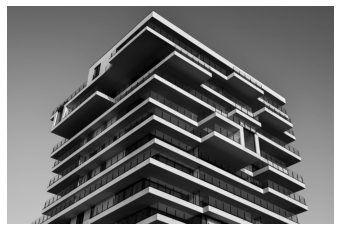

In [8]:
# plot image
plt.imshow(small_img, cmap='gray')
plt.axis('off');

## Specify the Filters

In [9]:
# Feel free to modify the numbers here, to try out another filter!
filter_vals = np.array([[-1, -1, 1, 1], 
                        [-1, -1, 1, 1], 
                        [-1, -1, 1, 1], 
                        [-1, -1, 1, 1]])

In [10]:
# define four filters
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_1.T
filter_4 = -filter_3
filters = [filter_1, filter_2, filter_3, filter_4]

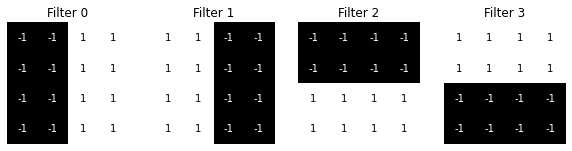

In [11]:
# visualize all filters
fig, axes = plt.subplots(ncols=4, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(filters[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i}')
    width, height = filters[i].shape
    for x in range(width):
        for y in range(height):
            ax.annotate(str(filters[i][x][y]), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if filters[i][x][y]<0 else 'black')

## Visualize the Activation Maps for Each Filter

(-0.5, 1531.5, 1020.5, -0.5)

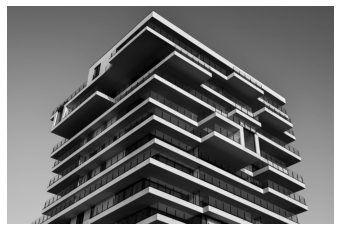

In [12]:
plt.imshow(small_img, cmap='gray')
plt.axis('off')

### Define single-layer CNN

In [13]:
cnn = Sequential([
    Convolution2D(1, (4, 4), 
                  activation='relu', 
                  input_shape=(small_img.shape[0], small_img.shape[1], 1))
])

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 1018, 1529, 1)     17        
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


### Apply convolutional filter and return output

In [15]:
def apply_filter(img, index, filter_list, ax):
    # set the weights of the filter in the convolutional layer to filter_list[i]
    cnn.layers[0].set_weights([np.reshape(filter_list[i], (4,4,1,1)), np.array([0])])
    # plot the corresponding activation map
    ax.imshow(np.squeeze(cnn.predict(np.reshape(img, (1, img.shape[0], img.shape[1], 1)))), cmap='gray')

The edges are visible in the bottom row, but YMMV depending on your screen resolution.

In [ ]:
# visualize all filters
fig, axes = plt.subplots(ncols=4, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(filters[i], cmap='gray')
    ax.axis('off')
    ax.set_title(f'Filter {i}')
fig.tight_layout()

# visualize all activation maps
fig, axes = plt.subplots(ncols=4, figsize=(20, 20))
for i, ax in enumerate(axes):
    apply_filter(small_img, i, filters, ax)
    ax.axis('off')
    ax.set_title(f'Activation Map for Filter {i}')
fig.tight_layout()